In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("processed.cleveland.data", header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df.columns = [
    'age',
    'sex',
    'cp',
    'trestbps',
    'chol',
    'fbs',
    'restecg',
    'thalach',
    'exang',
    'oldpeak',
    'slope',
    'ca',
    'thal',
    'hd' 
]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

In [5]:
df.ca.value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [6]:
df.thal.value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [7]:
df2 = df.loc[(df['ca']!='?') & (df['thal']!='?')]
df2.thal.value_counts()

3.0    164
7.0    115
6.0     18
Name: thal, dtype: int64

In [8]:
df2.shape

(297, 14)

In [9]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [10]:
feature_with_nan = [feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_with_nan

[]

In [11]:
df2.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
hd            5
dtype: int64

In [12]:
df_encoded =  pd.get_dummies(df2,columns=['cp','restecg','slope','thal'])
df_encoded

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,hd,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,2,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,1,...,1,1,0,0,0,1,0,0,0,1
298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,1,...,0,1,0,0,0,1,0,0,0,1
299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,2,...,1,1,0,0,0,1,0,0,0,1
300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,3,...,1,1,0,0,0,1,0,0,0,1


In [14]:
X= df_encoded.drop('hd',axis='columns')
X.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [15]:
y = df_encoded['hd']
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [16]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [17]:
y[y>0]=1
y.head()

<ipython-input-17-193e3a6fea27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y>0]=1


0    0
1    1
2    1
3    0
4    0
Name: hd, dtype: int64

In [18]:
y.unique()

array([0, 1], dtype=int64)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
clf_dt = DecisionTreeClassifier(random_state=42)
model = clf_dt.fit(X_train,y_train)
model.score(X_test,y_test)

0.76

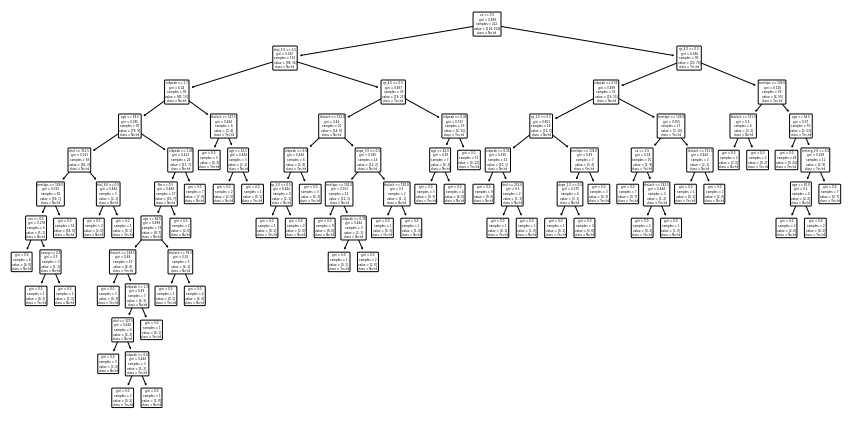

In [29]:
plt.figure(figsize = (15,7.5))
plot_tree(model,
    max_depth=None,
    feature_names=X.columns,
    class_names=['No hd','Yes hd'],
    label='all',
    filled=False,
    impurity=True,
    node_ids=False,
    proportion=False,
    rotate='deprecated',
    rounded=True,
    precision=3,
    ax=None,
    fontsize=None,)

plt.show()

## Cost Complexity Pruning

In [38]:
path = model.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt,X_train,y_train,cv=5)
    alpha_loop_values.append([ccp_alpha,np.mean(scores)])

In [51]:
alpha_loop_values[0]

[0.0, 0.6755555555555556]

<AxesSubplot:xlabel='ccp_alpha'>

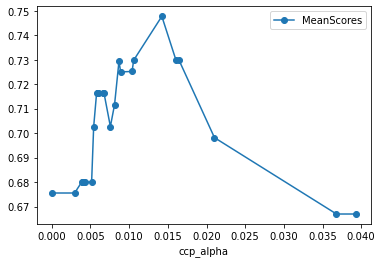

In [52]:
alpha_df = pd.DataFrame(alpha_loop_values,columns= ['ccp_alpha', 'MeanScores'])

alpha_df.plot('ccp_alpha','MeanScores', marker='o')
 


In [54]:
alpha_df[alpha_df['MeanScores']>0.74]

,ccp_alpha,MeanScores
20,0.014225,0.747778


#### So the value of alpha which provides maximum accuracy is 0.014225

In [55]:
# Lets train a classifier with this value of alpha
clf_dt_pruned = DecisionTreeClassifier(random_state=42,ccp_alpha=0.014225)
clf_dt_pruned = clf_dt_pruned.fit(X_train,y_train)

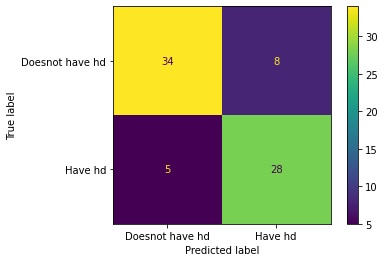

In [57]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_dt_pruned,X_test,y_test,display_labels=['Doesnot have hd','Have hd'])

In [58]:
clf_dt_pruned.score(X_test,y_test)

0.8266666666666667

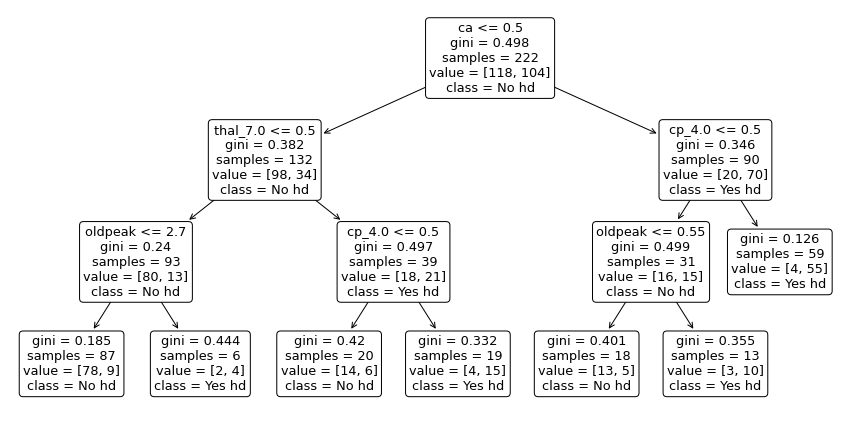

In [59]:
plt.figure(figsize = (15,7.5))
plot_tree(clf_dt_pruned,
    max_depth=None,
    feature_names=X.columns,
    class_names=['No hd','Yes hd'],
    label='all',
    filled=False,
    impurity=True,
    node_ids=False,
    proportion=False,
    rotate='deprecated',
    rounded=True,
    precision=3,
    ax=None,
    fontsize=None,)

plt.show()